In [ ]:
# default_exp hamilton

In [ ]:
#export
import torch
import torch.nn as nn
import torch.nn.functional as F

# hamilton

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

Staggered midpoint

\begin{equation}
x_n = x_{n-1} + k y_{n-\frac{1}{2}}, y_{n+\frac{1}{2}} = y_{n-\frac{1}{2}} - k x_n, n = 1,\ldots,N-1,
\end{equation}
starting with $y_{\frac{1}{2}} = y_{0} - \frac{k}{2} x_0$ and ending with 
$x_N = x_{N-1} + k y_{N-\frac{1}{2}}, y_{N} = y_{N-\frac{1}{2}} - \frac{k}{2} x_n$.
This is called the **Stormer-Verlet** method.

Ref: Uri M. Ascher. Numerical methods for Evolutionary Differential Equations.

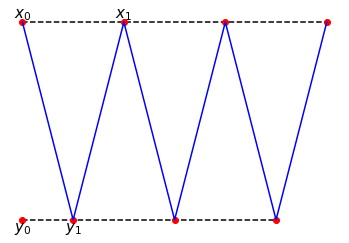

In [ ]:
x0 = [0, 0, 0.5, 1, 1.5, 2, 2.5, 3]
y0 = [0, 1, 0, 1, 0, 1, 0, 1]
x1 = [0, 0.5, 1, 1.5, 2, 2.5, 3]
y1 = [1, 0, 1, 0, 1, 0, 1]
plt.axis('off')
plt.plot(x0, y0, 'ro', x1, y1, 'b-')
plt.hlines(0, 0, 2.5, linestyles='dashed')
plt.hlines(1, 0, 3, linestyles='dashed')
plt.text(0, 1, '$x_0$', horizontalalignment='center', verticalalignment='bottom', fontsize=15)
plt.text(0, 0, '$y_0$', horizontalalignment='center', verticalalignment='top', fontsize=15)
plt.text(1, 1, '$x_1$', horizontalalignment='center', verticalalignment='bottom', fontsize=15)
plt.text(0.5, 0, '$y_1$', horizontalalignment='center', verticalalignment='top', fontsize=15)
plt.show()

In [ ]:
#export
class HamLinear(nn.Module):
    """
    Hamilonian Linear Module.
    Args:
    -- row, col: 
    -- alpha:
    -- std:
    -- act:
    -- is_alpha_trainable:
    """
    def __init__(self, row:int, col:int, alpha:float, std:float=None, act:nn.Module=nn.ReLU, is_alpha_trainable:bool=False):
        super(HamLinear, self).__init__()
        if std is None:
            self.std = torch.sqrt(2*torch.tensor(row+col, dtype=torch.float))
        else:
            self.std = torch.tensor(std, dtype=torch.float)
            
        self.W = nn.Parameter(torch.randn(row, col) / std)
        
        if is_alpha_trainable:
            self.alpha = nn.Parameter(torch.tensor(alpha))
        else:
            self.alpha = torch.tensor(alpha)
        
        self.act = act()
    
    def forward(self, x, y:torch.tensor=None):
        if y is None:
            y = self.alpha / 2 * self.act(x).matmul(-self.W.T)
        else:
            x = x + self.alpha * self.act(y).matmul(self.W)
            y = y + self.alpha * self.act(x).matmul(-self.W.T)
        return x, y

In [ ]:
import torchvision

In [ ]:
to_tensor = torchvision.transforms.ToTensor()
normalize = torchvision.transforms.Normalize((0.1307,), (0.3081,))

transforms = torchvision.transforms.Compose([to_tensor, normalize])

In [ ]:
train_data = torchvision.datasets.FashionMNIST('../../data', download=True, transform=transforms)

In [ ]:
test_data = torchvision.datasets.FashionMNIST('../../data', train=False,
                                               download=True, transform=transforms)

In [ ]:
bs = 4
train_loader = torch.utils.data.DataLoader(train_data,
                            batch_size=bs,
                            shuffle=True,
                            num_workers=16)

In [ ]:
I = iter(train_loader)

In [ ]:
batch_images = next(I)[0]
batch_images.shape

torch.Size([4, 1, 28, 28])

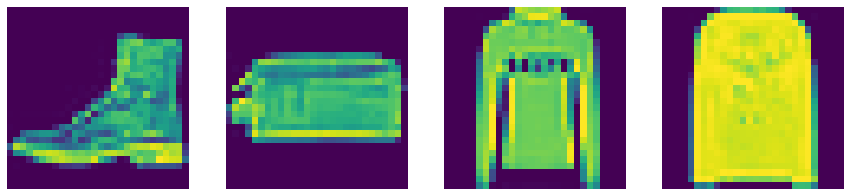

In [ ]:
plt.figure(figsize=(15,15))
for i in range(bs):
    plt.subplot(1, bs, i+1)
    plt.axis('off')
    plt.imshow(batch_images[i,0,:,:].detach().numpy())

In [ ]:
row, col = 28*28, 28*28
alpha = 1.
act = nn.ReLU # nn.Sigmoid # nn.Tanh # nn.ReLU  # nn.Identity
ham_init = HamInit(row, col, alpha, act=act)


In [ ]:
x0 = batch_images.view(bs, -1)
x = x0
y = ham_init(x)
out_data = y.view(bs,1,28,28)
out_data.shape

torch.Size([4, 1, 28, 28])

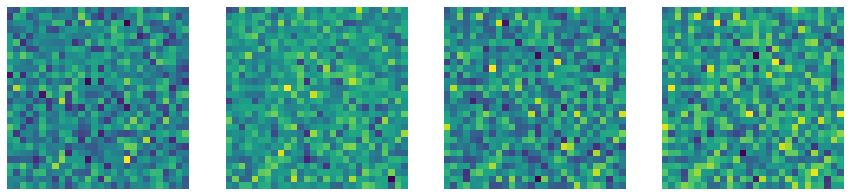

In [ ]:
plt.figure(figsize=(15,15))
for i in range(bs):
    plt.subplot(1, bs, i+1)
    plt.axis('off')
    plt.imshow(out_data[i,0,:,:].detach().numpy())

In [ ]:
ham_linear = HamLinear(row, col, alpha, act=act)

In [ ]:
x1, y1 = ham_linear(x, y)

In [ ]:
out_data = x1.view(bs,1,28,28)
out_data.shape

torch.Size([4, 1, 28, 28])

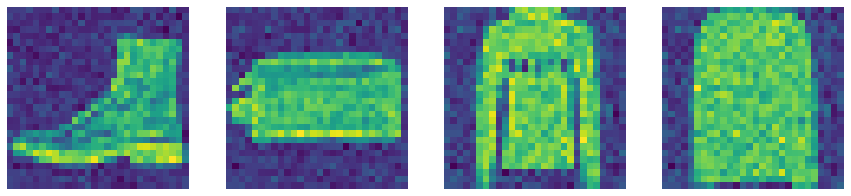

In [ ]:
plt.figure(figsize=(15,15))
for i in range(bs):
    plt.subplot(1, bs, i+1)
    plt.axis('off')
    plt.imshow(out_data[i,0,:,:].detach().numpy())

In [ ]:
x[0]

tensor([-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.42

In [ ]:
x1[0]

tensor([-0.3351, -0.3144, -0.3120, -0.0900, -0.4556, -0.4641, -0.4828, -0.0513,
        -0.6334, -0.5049, -0.2675, -0.4936, -0.3189, -0.6110, -0.2672, -0.2091,
        -0.7759, -0.5682, -0.7192, -0.0139, -0.0452, -0.3064, -0.2534, -0.3676,
        -0.7510,  0.0984, -0.5788, -0.5693, -0.2025, -0.4641, -0.3249, -0.5678,
        -0.4617, -0.5753, -0.6872, -0.4906, -0.5003, -0.6857, -0.3083, -0.7930,
        -0.3776, -0.6174, -0.5913, -0.5759, -0.6398, -0.6567, -0.3825, -0.3594,
        -0.1206, -0.7258, -0.1324, -0.7328, -0.3449, -0.4982, -0.9682, -0.2596,
        -0.5087, -0.4249, -0.5773, -0.5371, -0.2990, -0.6172, -0.5741, -0.4432,
        -0.5205, -0.3277, -0.6483, -0.0440, -0.5998, -0.5867, -0.2898, -0.1549,
        -0.2046, -0.1911, -0.1196, -0.1247, -0.7007, -0.3053, -0.4676,  0.0315,
        -0.4866, -0.3666, -0.1699, -0.5476, -0.6814, -0.7475, -0.3722, -0.3220,
        -0.3387, -0.5420,  0.0835, -0.3365, -0.7396, -0.4575, -0.4742, -0.5856,
        -0.5943, -0.5156, -0.3663, -0.57